# A

In [1]:
import math

def nakamoto(n, q):
    p = 1 - q
    la = n * (q / p)
    
    s = 0.0
    for k in range(0, n):
        s += math.exp(-la) * ((la ** k) / math.factorial(k)) * (1 - (q / p) ** (n - k))
    
    return 1 - s

In [2]:
import scipy.special

def grunspan(n, q):
    p = 1 - q
    
    s = 0.0
    for k in range(0, n):
        s += (p ** n * q ** k - q ** n * p ** k) * scipy.special.comb(k + n - 1, k)
    
    return 1 - s

### Ustal n = 1, 3, 6, 12, 24, 48 i przedstaw wykresy P(n, q) w zależności od wartości q

In [3]:
import numpy as np
ns = [1, 3, 6, 12, 24, 48]
q_range = np.arange(0.01, 0.49, 0.01)

In [4]:
grunspan_for_ns = {}
for n in ns:
    grunspan_for_ns[n] = []
    for q in q_range:
       grunspan_for_ns[n].append(
         (q, grunspan(n, q))
       )

nakamoto_for_ns = {}
for n in ns:
    nakamoto_for_ns[n] = []
    for q in q_range:
       nakamoto_for_ns[n].append(
         (q, nakamoto(n, q))
       )

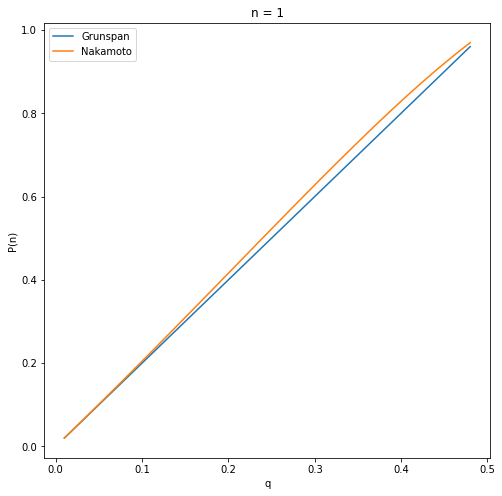

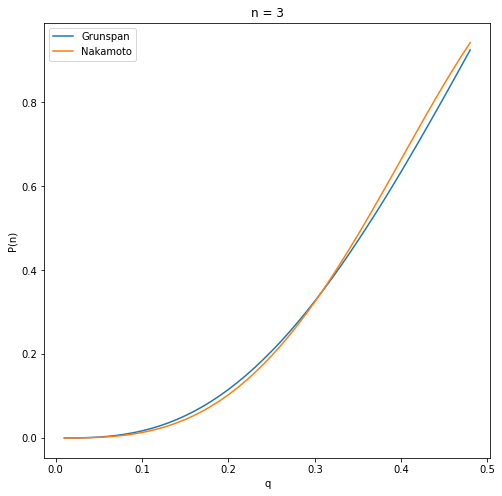

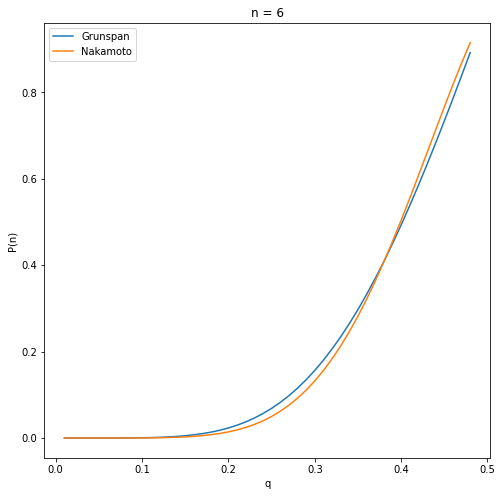

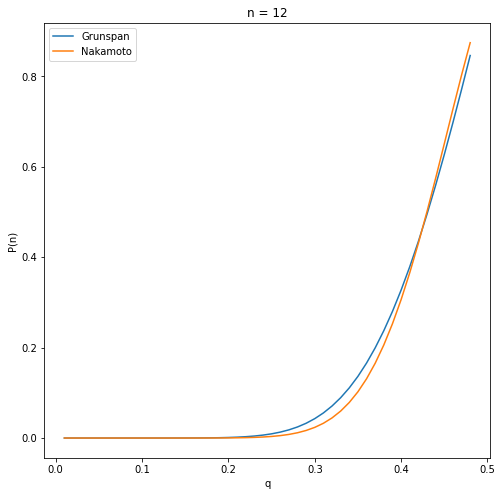

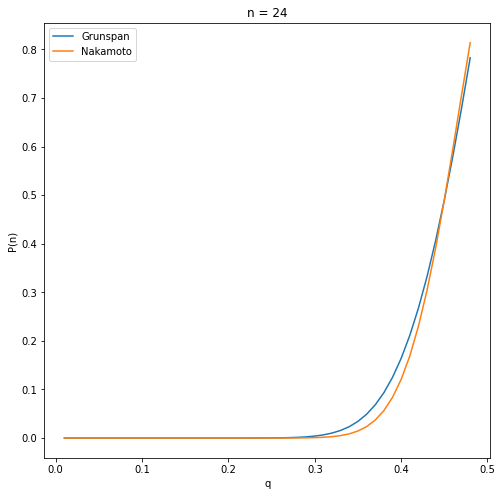

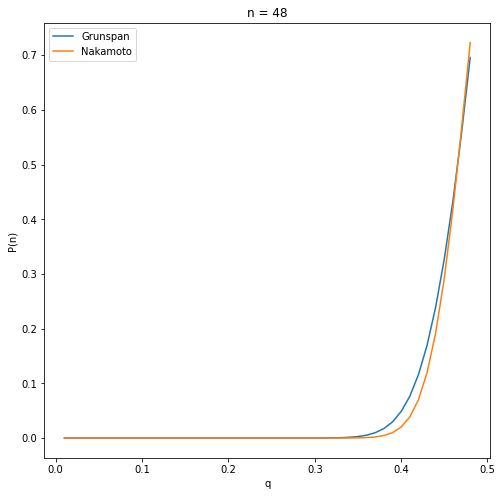

In [5]:
import matplotlib.pyplot as plt

for n in ns:
    plt.figure(1, figsize=(8, 8))
    plt.xlabel("q")
    plt.ylabel("P(n)")
    plt.title("n = " + str(n))
    x1, y1 = zip(*grunspan_for_ns[n])
    x2, y2 = zip(*nakamoto_for_ns[n])
 
    plt.plot(x1, y1, label="Grunspan")
    plt.plot(x2, y2, label="Nakamoto")
    plt.legend()
    plt.show()

### Ustal dopuszczalne prawd.sukcesu adwersarza P(n, q) = 0.1%, 1%, 10% i narysuj wykresy przedstawiające jak należy dobrać wartość n w zależności od wartości q

In [6]:
ps = [0.001, 0.01, 0.1]

def find_n(p, q, f):
    for n in range(0, 120):
        if f(n, q) <= p:
            return n

p_data_nakomoto = {}
p_data_grunspan = {}

for p in ps:
    p_data_nakomoto[p] = []
    p_data_grunspan[p] = []

    for q in q_range:
        p_data_nakomoto[p].append((q, find_n(p, q, nakamoto)))
        p_data_grunspan[p].append((q, find_n(p, q, grunspan)))
        

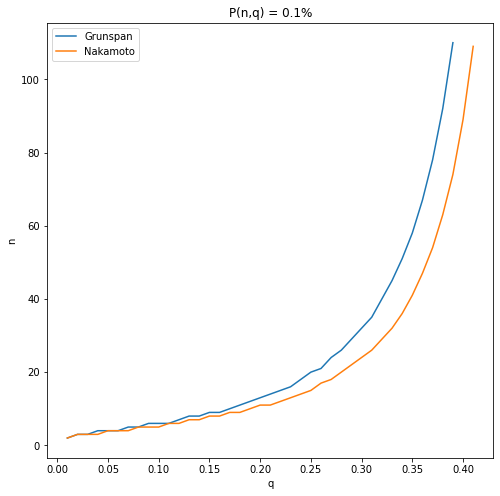

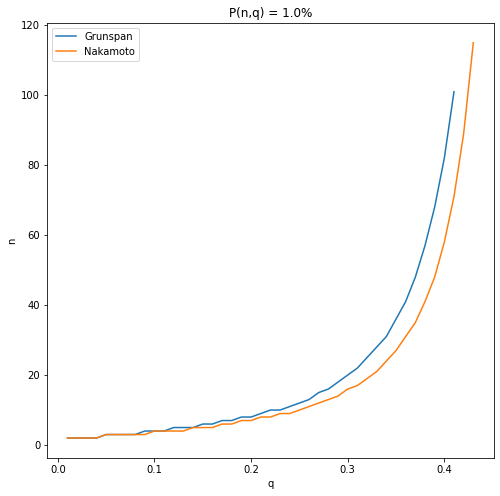

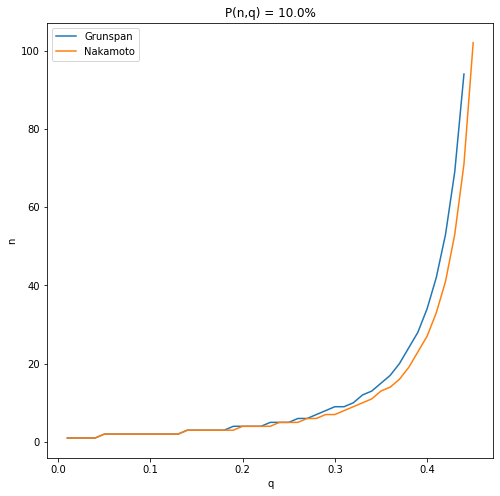

In [7]:
for p in ps:
    plt.figure(1, figsize=(8, 8))
    plt.xlabel("q")
    plt.ylabel("n")
    plt.title("P(n,q) = " + str(p * 100) + "%")
    x1, y1 = zip(*p_data_grunspan[p])
    x2, y2 = zip(*p_data_nakomoto[p])
 
    plt.plot(x1, y1, label="Grunspan")
    plt.plot(x2, y2, label="Nakamoto")
    plt.legend()
    plt.show()

# B

In [69]:
import random

experiments_num = 1000

def single_pass(n, q):
    max_dist = 30
    legitimate_branch = 0
    adversary_branch = 0

    while True:
        if random.random() <= q:
            adversary_branch += 1
        else:
            legitimate_branch += 1

        if legitimate_branch < n:
            continue
    
        if adversary_branch >= legitimate_branch:
            return True
        elif legitimate_branch >= n + max_dist:
            return False

# def single_pass(n, q):
#     users = 0
#     adversary = 0

#     while True:
#         if random.random() <= q:
#             adversary += 1
#         else:
#             users += 1

#         if users > n:
#             if adversary >= users:
#                 return 1

#             if users - adversary >= max_dist:
#                 return 0

def simulate_for_n_q(n, q):
    succ = 0
    for _ in range(0, experiments_num):
        succ += single_pass(n, q)

    return succ / experiments_num



experimental = {}

for n in ns:
    experimental[n] = []
    print(n)
    for q in q_range:
        experimental[n].append(
          (q, simulate_for_n_q(n, q))
        )

1
3
6
12
24
48


In [70]:
print(experimental[1][40])
print(grunspan_for_ns[1][40])
print(nakamoto_for_ns[1][40])

(0.41000000000000003, 0.821)
(0.41000000000000003, 0.8200000000000001)
(0.41000000000000003, 0.8477270949830977)


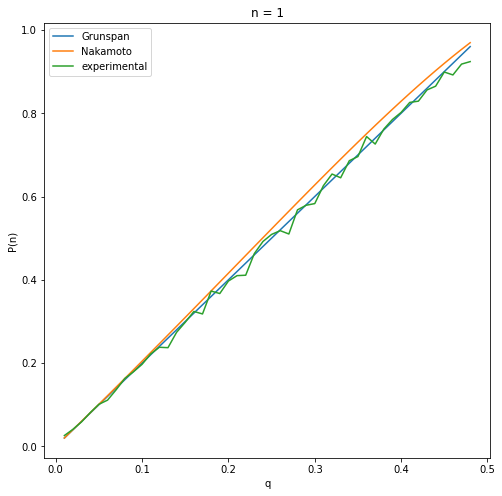

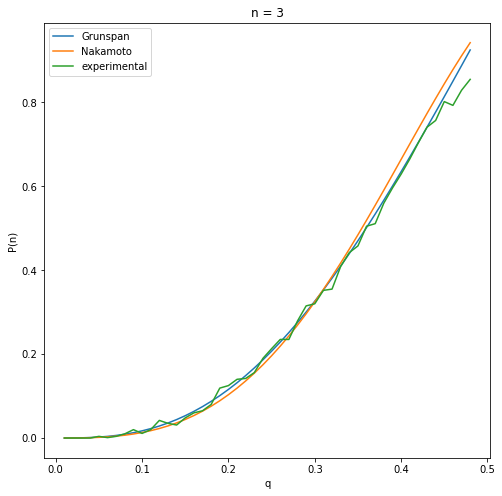

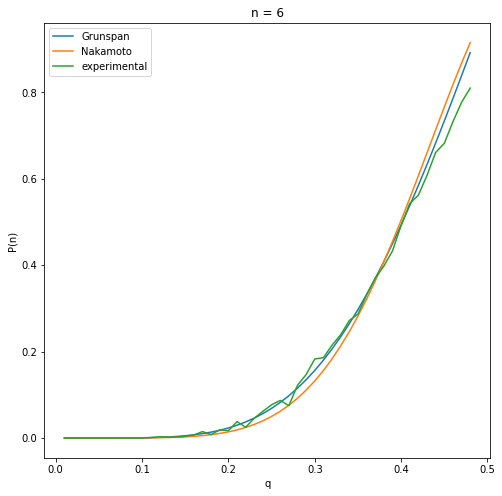

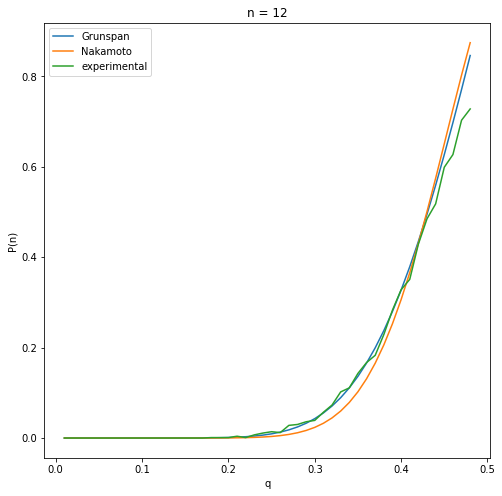

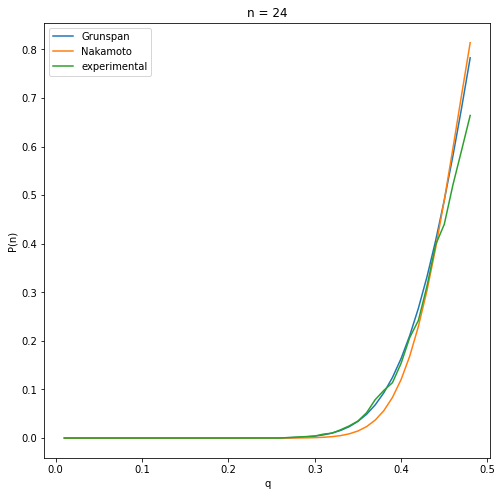

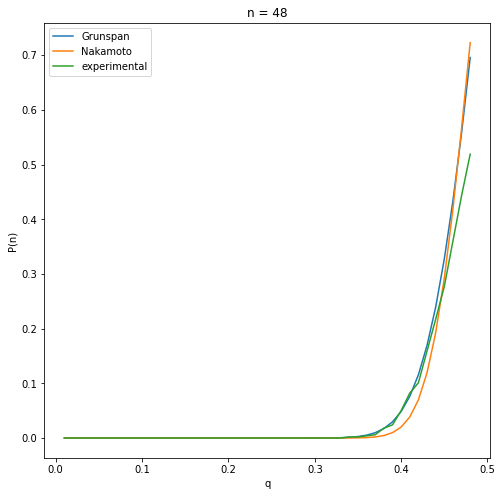

In [66]:
for n in ns:
    plt.figure(1, figsize=(8, 8))
    plt.xlabel("q")
    plt.ylabel("P(n)")
    plt.title("n = " + str(n))
    x1, y1 = zip(*grunspan_for_ns[n])
    x2, y2 = zip(*nakamoto_for_ns[n])
    x3, y3 = zip(*experimental[n])
 
    plt.plot(x1, y1, label="Grunspan")
    plt.plot(x2, y2, label="Nakamoto")
    plt.plot(x3, y3, label="experimental")
    plt.legend()
    plt.show()